In [45]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

TO DO:
- summarize findings. Is there a relationship? What is it? What are the best predictors?
- Were our results expected?
- Impact of our findings?
- Future Questions?
- shrink predictor plots (too big rn, take up lots of scrolling space (Use repr plot))
- as per rubric, narrate code blocks in a block of text instead of only hashtags
- word count (written text only, not code/refs)

# Heart Disease and Age
<img align="left" src="https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/slideshows/how_heart_disease_affects_your_body_slideshow/650x350_how_heart_disease_affects_your_body_slideshow.jpg" width="500"/>

## Introduction

**Background Information**

Heart disease is a broad range of diseases that affects an individual's heart and blood vessels.

These diseases can be influenced by many factors, including underlying health conditions and lifestyle choices.


## Our Question 

Oftentimes, heart disease symptoms are reported to worsen with age. Generally, we would expect to predict a symptom's severity from age. However, we chose to use age as our response variable. Instead of showing a single relationship between a symptom and age, we opted to use age as our response variable which allowed the use of multiple symptoms as predictors. We chose to explore any correlation between heart disease symptoms and age in this combined method, as in real life, people with heart disease would have different symptoms due to a variety of factors. Exploring the relationship with age and a single symptom, although still useful and likely easier to model, gives a very narrow picture of correlation between heart disease symptoms and age by itself. Multiple analyses could be done to find the relationship between separate heart symptoms and age, but in our project we aimed to test whether age could be predicted by a combination of symptoms, which would have some potentially different new implications. We chose to explore this using a linear regression model with multiple symptoms as our predictors and age as our response variable.

All of this background can be summarized by our question -

Can the age of an individual with heart disease be predicted by the severity of their symptoms? If so, what are the best predictors? 

**The Dataset** 

We are using the “Heart Disease” dataset. This dataset describes a range of attributes, as well as an indication as to the presence of heart disease within each individual. The specific datasets we will be analyzing contains a subset of 14 main attributes, including information about a patient’s sex, age, symptoms, and diagnosis. The data has been collected in a variety of countries.

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Methods

In [30]:
# First we must read in the datasets.
van_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num"))

cleveland_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) 

hungary_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num"))

switzerland_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num"))

#Next, we can merge these, as they all have the same predictors. More data can ensure our analysis is more accurate.
#Each factor must be numeric for the purpose of our analysis, and we have to remove any N/A values.
heart_disease_data <- rbind(van_data_csv,cleveland_data_csv,hungary_data_csv, switzerland_data_csv) %>%
                select(-sex) %>%
                select(-num) %>%
                mutate_all(as.numeric) %>% 
                filter(age != "?") %>%
                filter(chest_pain != "?") %>%
                filter(chol != "?")%>%
                filter(fbs != "?") %>%
                filter(restecg != "?") %>%
                filter(thalach != "?")%>%
                filter(exang != "?")%>%
                filter(oldpeak != "?") %>%
                filter(slope != "?") %>%
                filter(ca != "?") %>%
                filter(thal != "?") %>%
                filter(trestbps != "?") %>%
                suppressWarnings

heart_disease_data

Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, chest_pain, restecg, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, chest_pain, trestbps, chol, fbs, restecg, thalach, exang...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, chest_pain, oldpeak, num

ℹ Use 

age,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,4,120,100,0,0,120,1,1.5,2,0,7
63,1,145,233,1,2,150,0,2.3,3,0,6
67,4,160,286,0,2,108,1,1.5,2,3,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,4,130,131,0,0,115,1,1.2,2,1,7
57,2,130,236,0,2,174,0,0.0,2,1,3
47,4,150,226,0,0,98,1,1.5,2,0,7


## Exploratory Data Analysis

In [31]:
#in order to make the analysis reproducible:
set.seed(2000)

#split the data into testing and training set:  
heart_split <- initial_split(heart_disease_data, prop = 0.60, strata = age) 
heart_training <- training(heart_split)  
heart_testing <- testing(heart_split)  

#In our exploratory data analysis, we used only three variables as predictors: age, resting electrocardiographic rate, 
#resting blood pressure, and cholesterol levels.
heart_data_explore <- heart_training %>%
             select(age, restecg, trestbps, chol) %>%
             arrange(desc(chol))


head(heart_data_explore)

age,restecg,trestbps,chol
<dbl>,<dbl>,<dbl>,<dbl>
67,2,115,564
65,2,140,417
56,2,134,409
63,2,150,407
62,2,140,394
65,2,160,360


This table shows that individuals with higher cholesterol levels tend to fall within an older age range (56 +)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



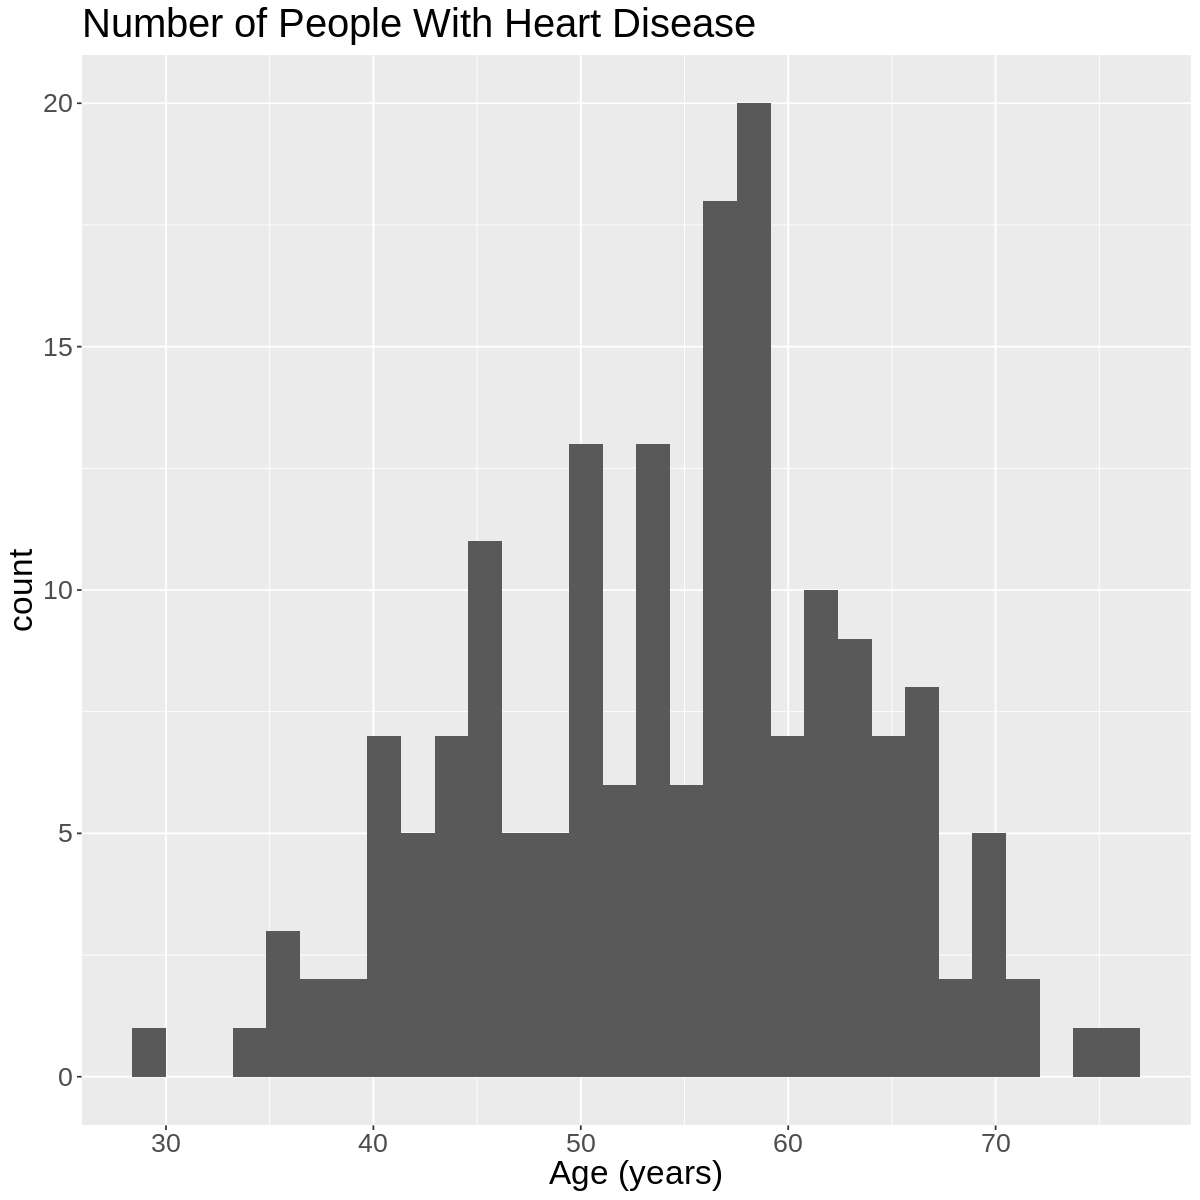

In [32]:
#In order to visualize the age distribution:
heart_plot_hist <- ggplot(heart_training, aes(x = age)) + 
            geom_histogram() + 
            labs(x = "Age (years)", title = "Number of People With Heart Disease") + 
            theme( text = element_text(size = 20)) 
heart_plot_hist

Through this histogram, we can see a correlation between age, and the quantity of people that contract heart disease. The majority of those with heart disease are between the ages of 55 and 65.

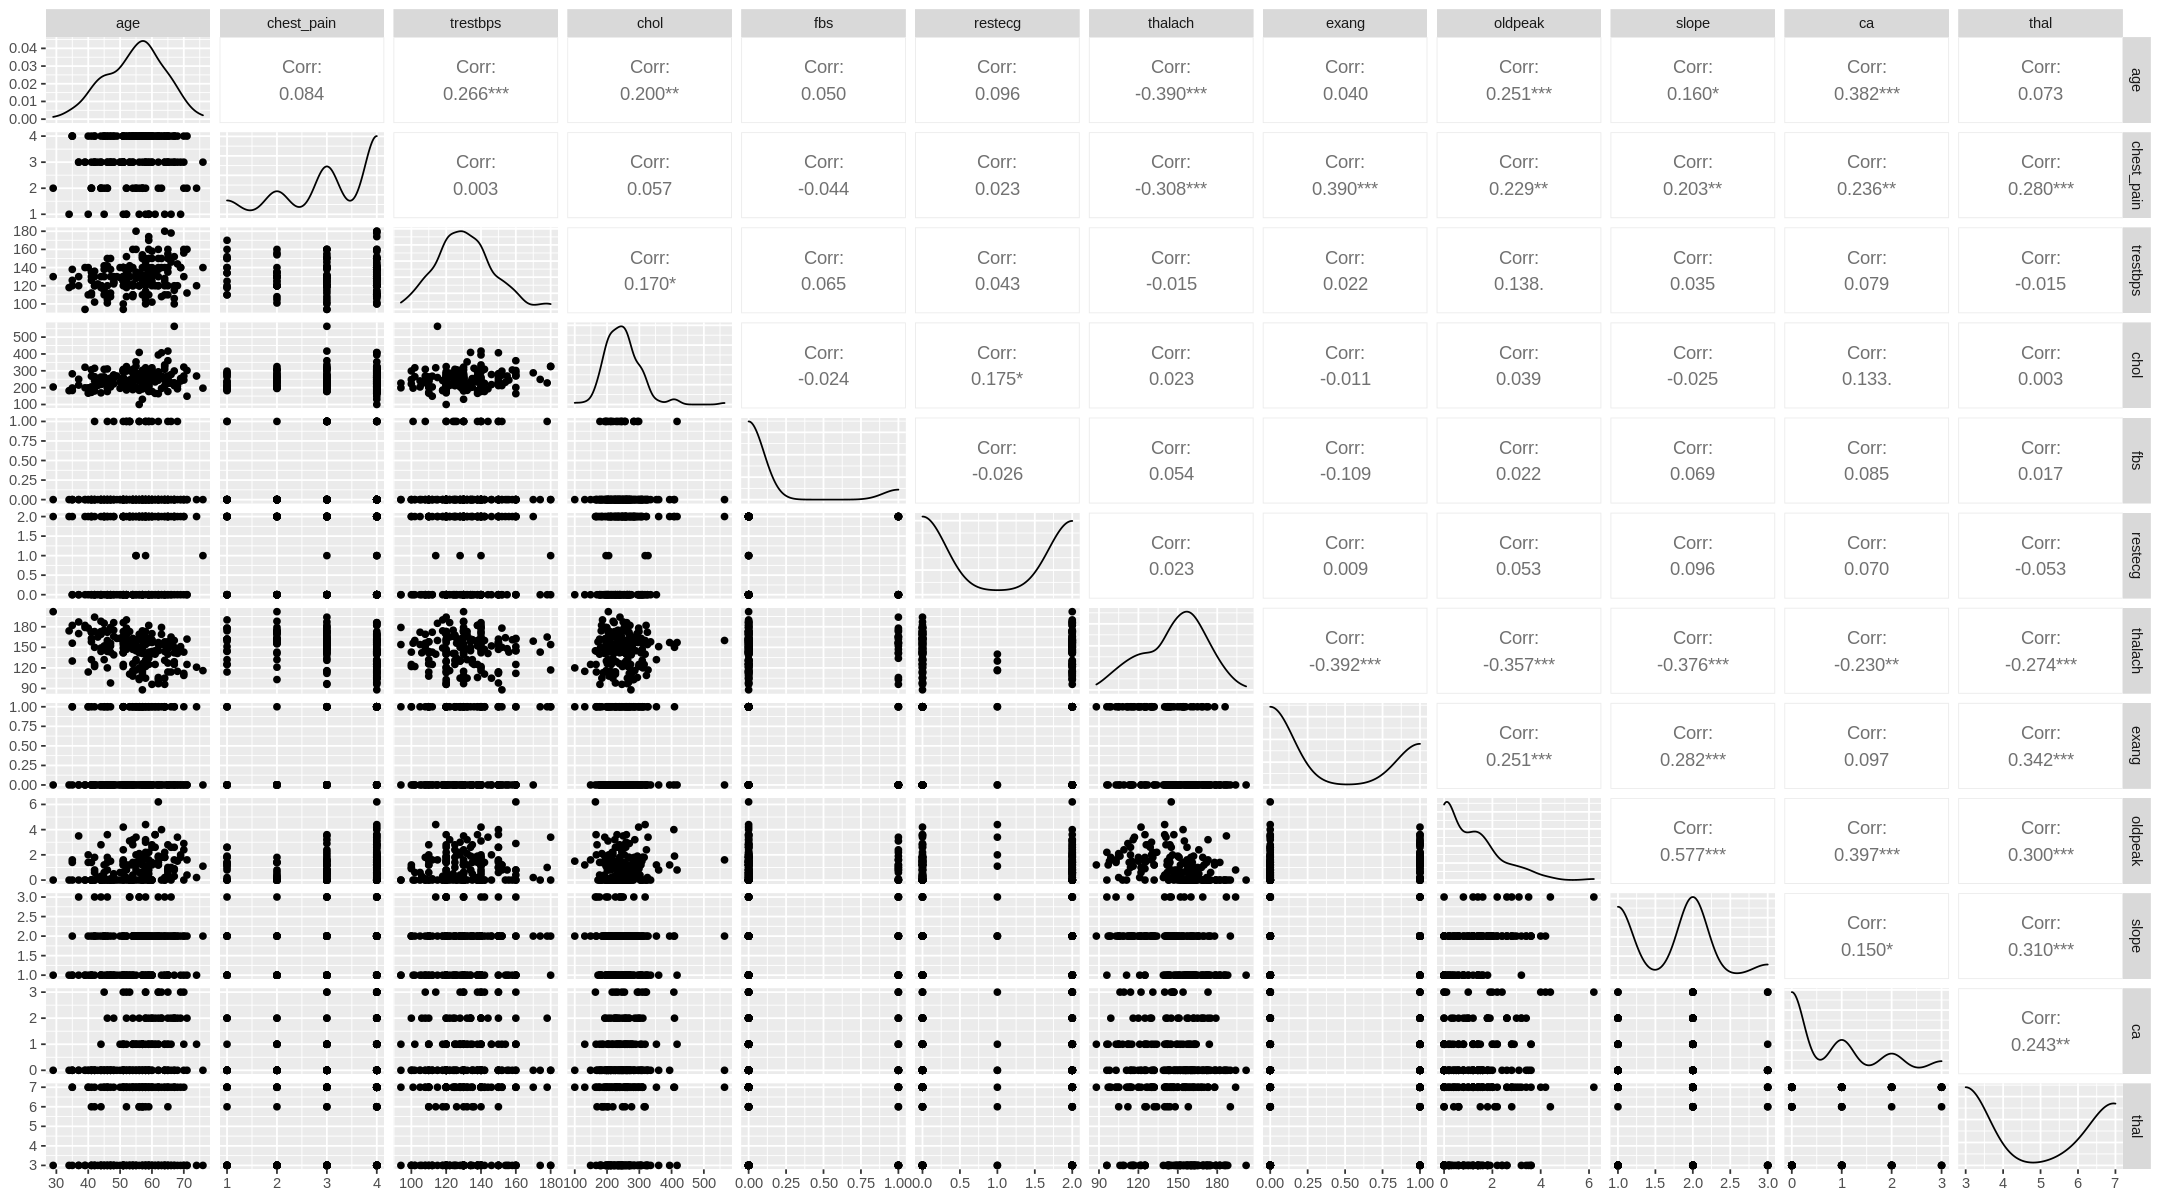

In [33]:
set.seed(2000)
options(repr.plot.width = 18, repr.plot.height = 10)

#To visualize the predictor variables:
heart_eda <- heart_training %>%
             ggpairs(columns = 1:12, alpha = 0.05) %>%
             suppressWarnings() 
             
heart_eda

This plot shows the correlations between each variable and age, we can see that the variable with the highest correlation is ca (the number of vessels coloured by flouroscopy).

## Methods 

In order to conduct our analysis we created a linear regression model. We selected the variables with the five highest correlation values, in order to create a more accurate model. The variables we selected are as follows:
- Trestbps - resting blood pressure.
Resting blood pressure (measured in mm Hg) is roughly 120/80 (systolic over diastolic measurements). A blood pressure level higher than this can cause damage to arteries, which can cause heart disease.
- Thalach - maximum heart rate achieved. 
An average, healthy heart rate is between 60-100 beats per minute. A heart rate outside of this range may indicate heart disease. Heart rate tends to decrease as one ages. 
- Ca - number of major vessels coloured by fluoroscopy.
Fluoroscopy is a medical procedure used to study moving structures within the body. In heart disease, this can be used to assess blood flow through arteries. Blood flow tends to decrease with age, due to the buildup of cholesterol and other factors.
- Oldpeak - ST depression induced by exercise relative to rest. 
ST depression is a term used to describe an abnormal downwards spike ("depression") on an electrocardiographic reading. A larger size and frequency of this occurrence are both indicators of more severe heart disease.
- Chol - serum cholesterol in mg/dL.
A healthy cholesterol level is around 200mg/dL. A level above 240mg/dL represents an individual at great risk (or who suffers with) heart disease. Individuals tend to accumulate higher cholesterol levels as they age due to both lifestyle and health changes.



## Linear Regression Model

In [34]:
set.seed(2000)
#create linear regression specs.
lm_spec <- linear_reg() %>%
    set_engine("lm") %>%
    set_mode("regression")

#Create a recipe to predict age. We used the variables with the five highest correlation values in the creation of our model.
heart_recipe <- recipe(age ~ trestbps + thalach + ca + oldpeak  + chol, data = heart_disease_data ) %>%
        step_scale(all_predictors()) %>%
        step_center(all_predictors()) 

print(lm_spec)
print(heart_recipe)

Linear Regression Model Specification (regression)

Computational engine: lm 

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()


In [35]:
set.seed(2000)
#create a workflow to fit the recipe to the model
heart_fit <- workflow() %>%
    add_recipe(heart_recipe) %>%
    add_model(lm_spec) %>%
    fit(data = heart_training)

heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)     trestbps      thalach           ca      oldpeak         chol  
    54.5876       1.9753      -3.0089       2.5066      -0.1092       1.2251  


In [36]:
set.seed(2000)
#determine the root mean square error of our model
lm_rmse <- heart_fit %>%
        predict(heart_training) %>%
        bind_cols(heart_training) %>%
        metrics(truth = age, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()

lm_rmse

[1] 7.495137

In [37]:
set.seed(2000)
#determine the root mean square prediction error of our model
lm_rmspe <- heart_fit %>%
        predict(heart_testing) %>%
        bind_cols(heart_testing) %>%
        metrics(truth = age, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()

lm_rmspe

[1] 7.602451

## Visualizations

.pred,age
<dbl>,<dbl>
47.48587,37
48.58764,41
48.70336,44
⋮,⋮
57.44459,66
54.21394,67
59.10109,68


.pred,age,residuals
<dbl>,<dbl>,<dbl>
47.48587,37,-10.485866
48.58764,41,-7.587638
48.70336,44,-4.703357
⋮,⋮,⋮
57.44459,66,8.555406
54.21394,67,12.786059
59.10109,68,8.898907


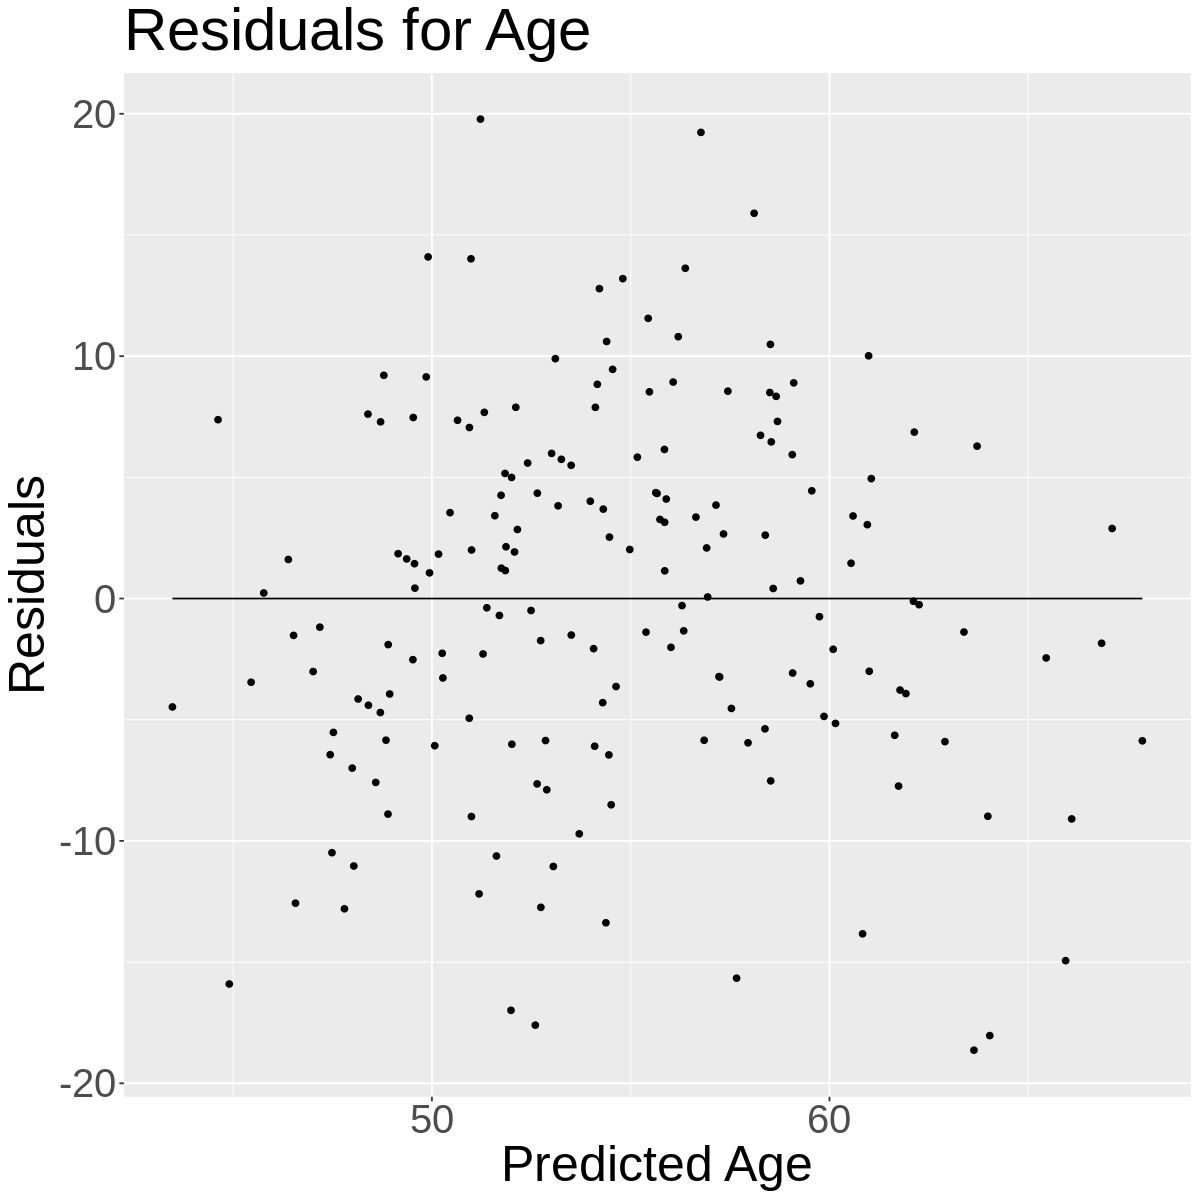

In [38]:
# create a dataframe of age & predicted age
heart_preds <-  heart_fit %>%
                predict(heart_training) %>%
                bind_cols(heart_training) %>%
                select(.pred, age)

heart_preds_tibble <-  as_tibble(heart_preds) 

heart_preds

 
# create a dataframe with a column for age residuals(observed - predicted age)
heart_preds_res <- heart_preds %>%
                mutate(residuals = age - .pred) 

heart_preds_res


# create a plot of predicted age vs. residuals for predicted age
options(repr.plot.width = 10, repr.plot.height = 10)
heart_res_plot <- ggplot(heart_preds_res, aes(x = .pred, y = residuals)) + 
                geom_point(alpha = 9) + 
                geom_line(y = 0) +
                xlab("Predicted Age") + 
                ylab("Residuals") + 
                ggtitle("Residuals for Age") +  
                theme(text = element_text(size = 30)) 
heart_res_plot

Interpretation of Residuals:

The residuals for a model of a good fit should be scattered above and below the x-axis with no pattern, and ideally closer to the x-axis. Residuals are the difference between the observed and predicted age. Consequently, if the predicted ages were almost exactly the correct observed ages, the residuals plot would have randomly scattered points located as close as possible to or even touching the x-axis (difference = 0 or close to it). If the majority of the residuals had extreme magnitudes, this would suggest that the model does not have a great fit.

In this plot, the residuals are mostly randomly scattered above and below x-axis (y = residuals = 0), although there may be a very subtle positive trend. Additionally, there are outliers located in the higher/lower range. The residuals range from approximately -15 to 20, although the majority seem to fall between -10 and 10, with areas of most concentration occuring from around -7 to 8. Our calculated errors RMSE and RMSPE were both around 7.5, so having the the majority of the residuals falling within +/- 7.5 is in agreement with these values.

If the residuals plot had showed a stronger positive linear trend, we would suspect the magnitude of the model slope was too large. If it had showed a curve, we might wonder whether an exponential model would work better than a linear one. 


Overall, the residuals seem to be randomly and evenly distributed enough to suggest that the model is of a reasonable fit, while the size of their range indicates that that there are still some issues with model fit.  The size of their range is definitely on the relatively larger side, and appears to be reflective of the calculated prediction error values.


**Predictors vs Age**

We compared each of the predictors used in our model with age, in order to visualize the individual relationships.

`geom_smooth()` using formula 'y ~ x'



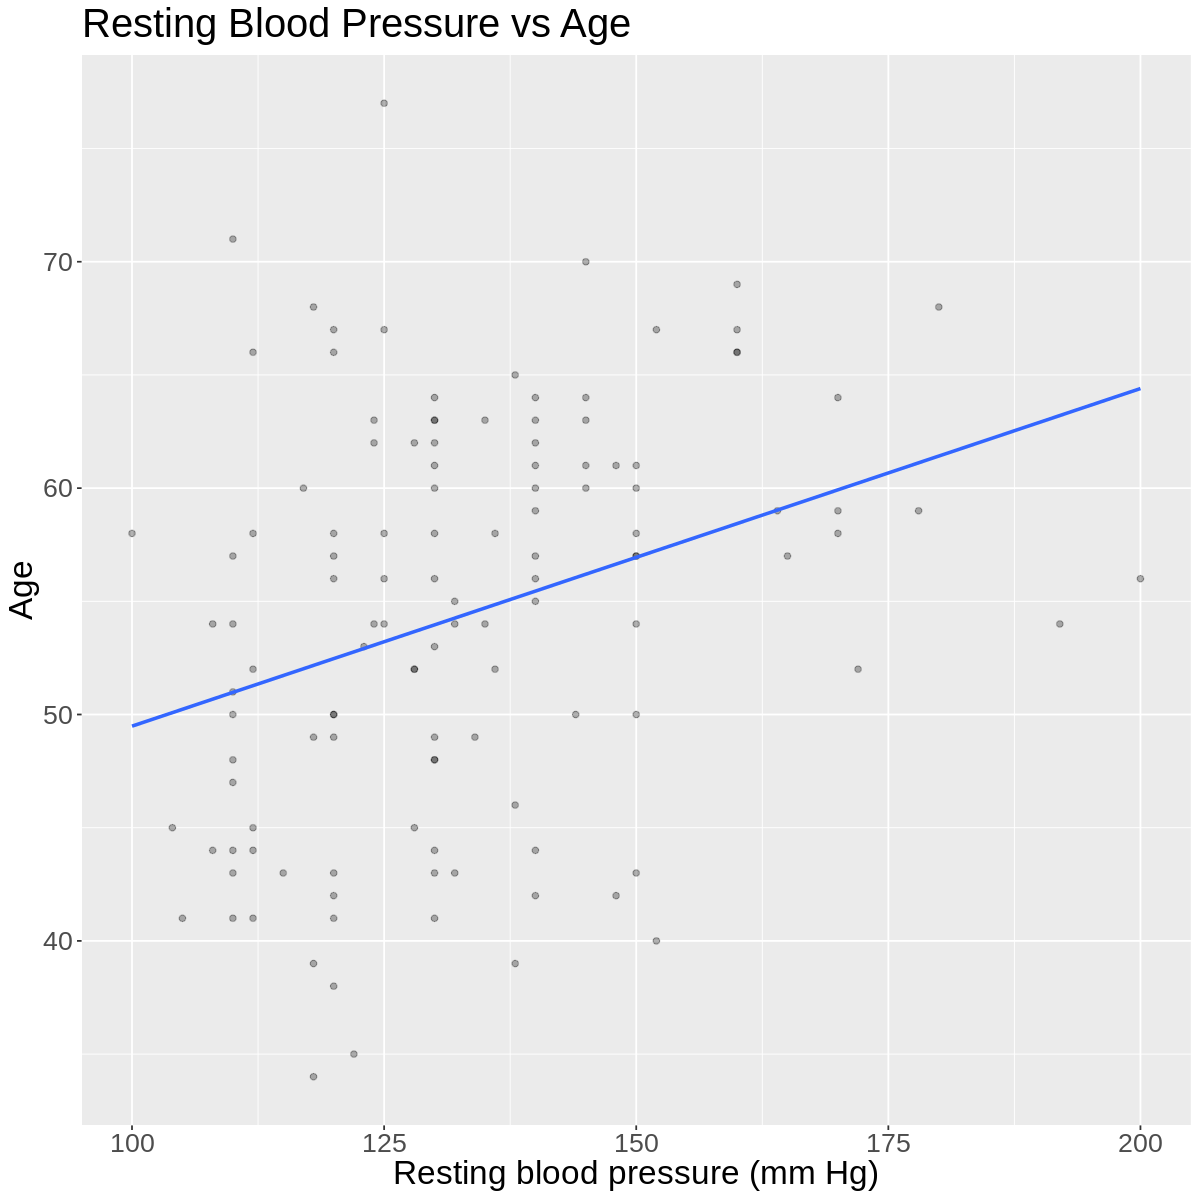

In [39]:
#Create a graph comparing resting blood pressure to age
trestbps_age_plot <- ggplot(heart_testing, aes(x = trestbps, y = age)) + 
                  geom_point(alpha = 0.3) +
                  xlab("Resting blood pressure (mm Hg)") + 
                  ylab("Age") + 
                  ggtitle("Resting Blood Pressure vs Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20))  
trestbps_age_plot

`geom_smooth()` using formula 'y ~ x'



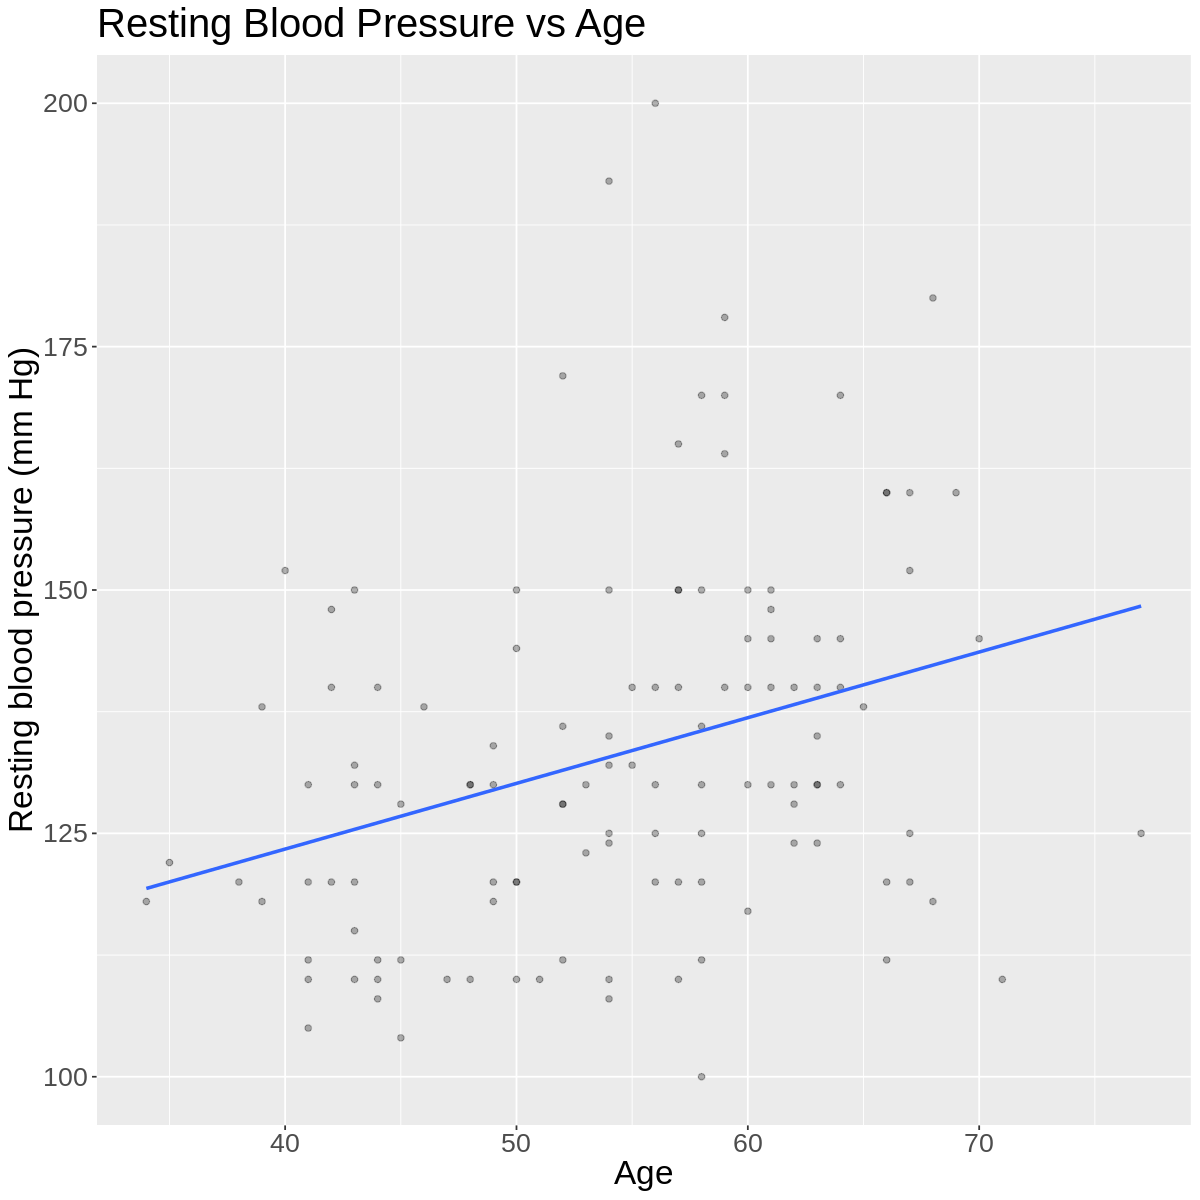

In [40]:
#Create a graph comparing resting blood pressure to age
trestbps_age_plot <- ggplot(heart_testing, aes(x = age, y = trestbps)) + 
                  geom_point(alpha = 0.3) +
                  xlab("Age") + 
                  ylab("Resting blood pressure (mm Hg)") + 
                  ggtitle("Resting Blood Pressure vs Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20))  
trestbps_age_plot

An overall weak positive linear relationship can be observed between the variables.

`geom_smooth()` using formula 'y ~ x'



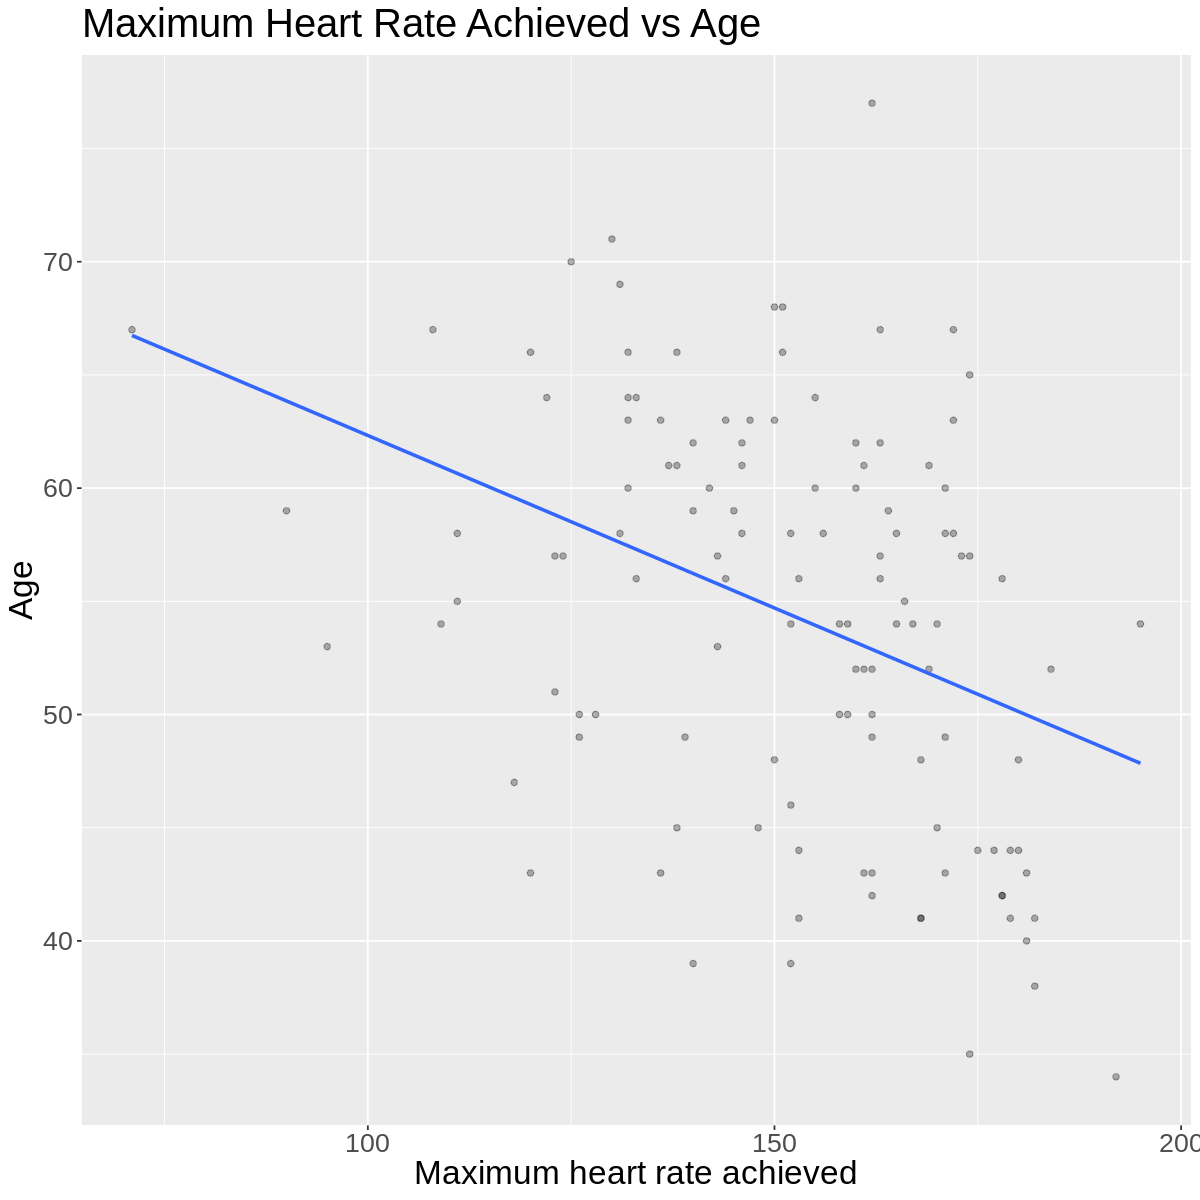

In [41]:
#Create a graph comparing resting maximum heart rate achieved to age
thalach_age_plot <- ggplot(heart_testing, aes(x = thalach, y = age)) + 
                  geom_point(alpha = 0.3) +
                  xlab("Maximum heart rate achieved") + 
                  ylab("Age") + 
                  ggtitle("Maximum Heart Rate Achieved vs Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20)) 
thalach_age_plot

A weak negative linear relationship can be observed between the variables. 

`geom_smooth()` using formula 'y ~ x'



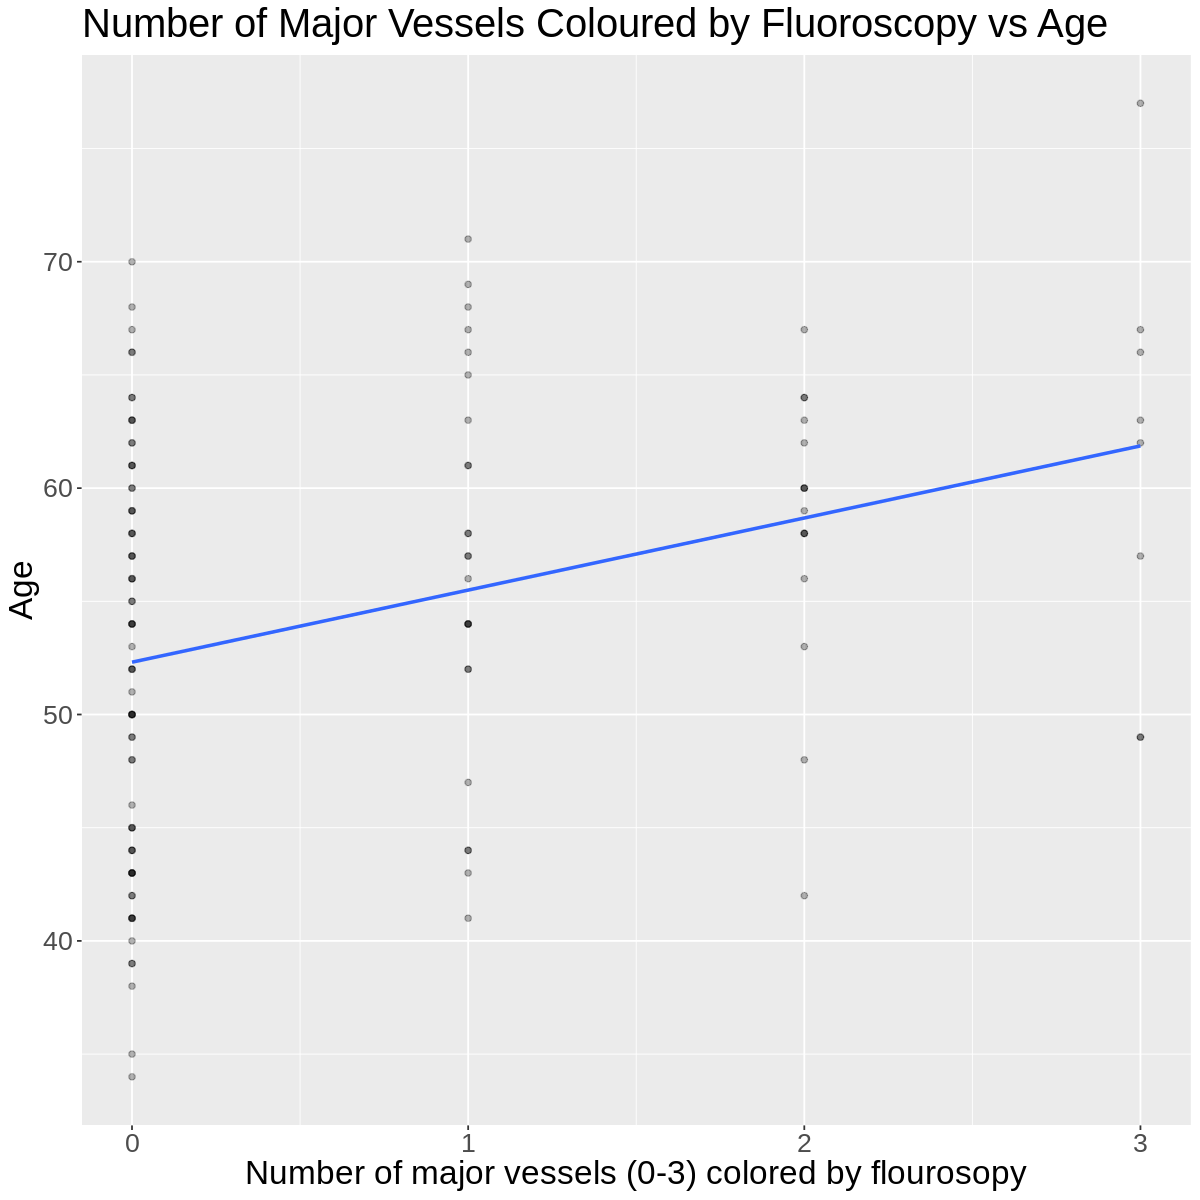

In [42]:
#Create a graph comparing number of major vessels coloured by fluoroscopy to age
ca_age_plot <- ggplot(heart_testing, aes(x = ca, y = age)) + 
                  geom_point(alpha = 0.3) +
                  xlab("Number of major vessels (0-3) colored by flourosopy") + 
                  ylab("Age") + 
                  ggtitle("Number of Major Vessels Coloured by Fluoroscopy vs Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20)) 
ca_age_plot

A weak positive linear relationship can be observed between the variables.

`geom_smooth()` using formula 'y ~ x'



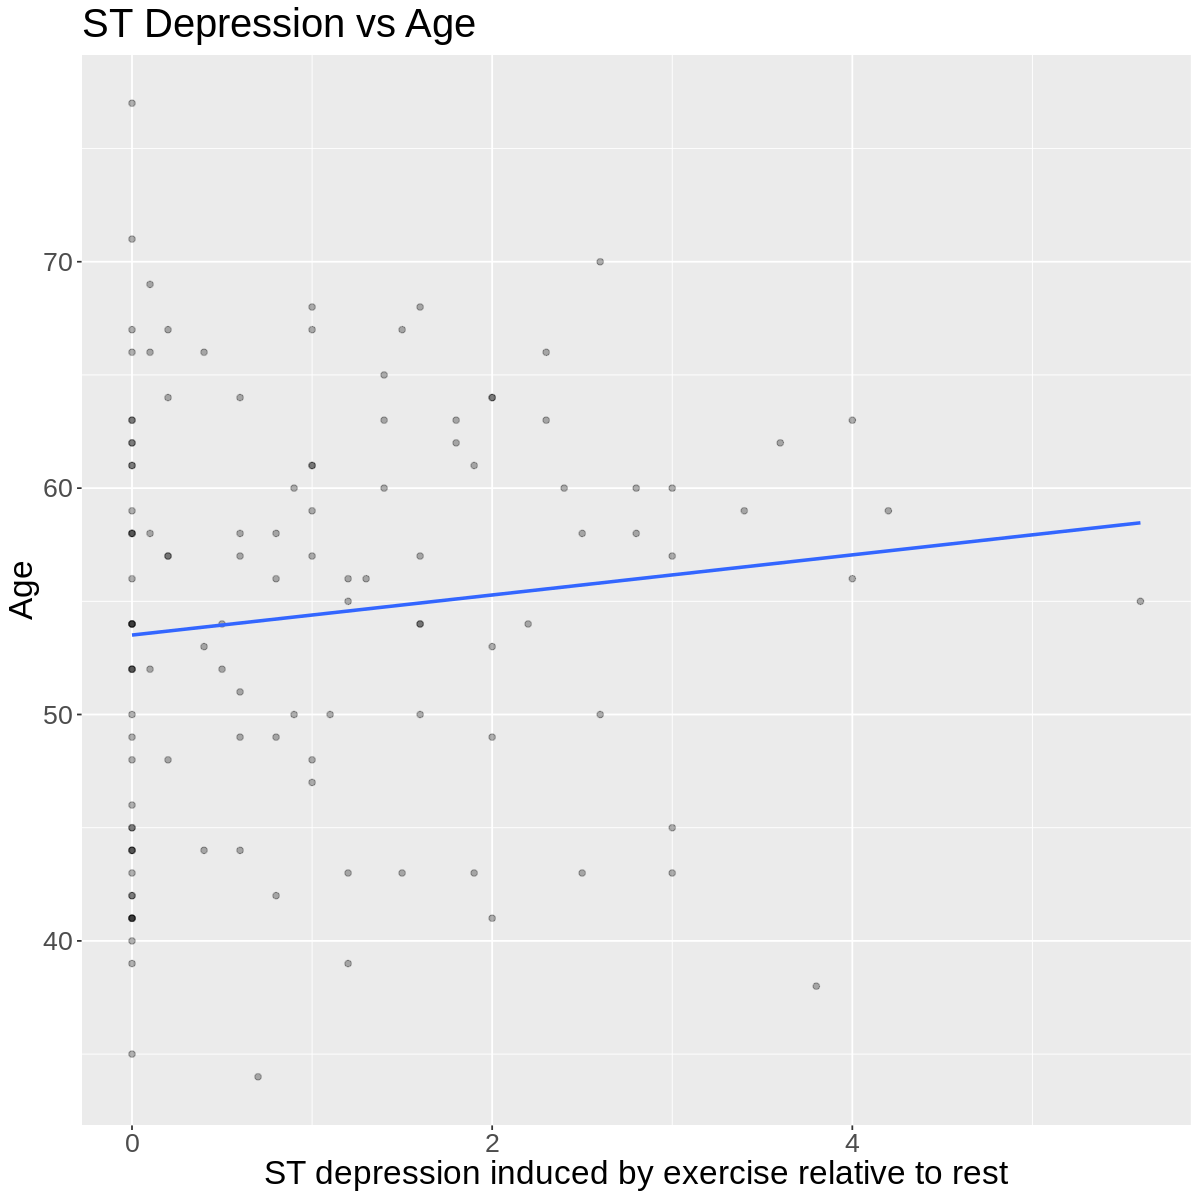

In [43]:
#Create a graph comparing ST depression to age
oldpeak_age_plot <- ggplot(heart_testing, aes(x = oldpeak, y = age)) + 
                  geom_point(alpha = 0.3) +
                  xlab("ST depression induced by exercise relative to rest") + 
                  ylab("Age") + 
                  ggtitle("ST Depression vs Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20)) 
oldpeak_age_plot

A weakly positive linear relationship can be observed between the variables.

`geom_smooth()` using formula 'y ~ x'



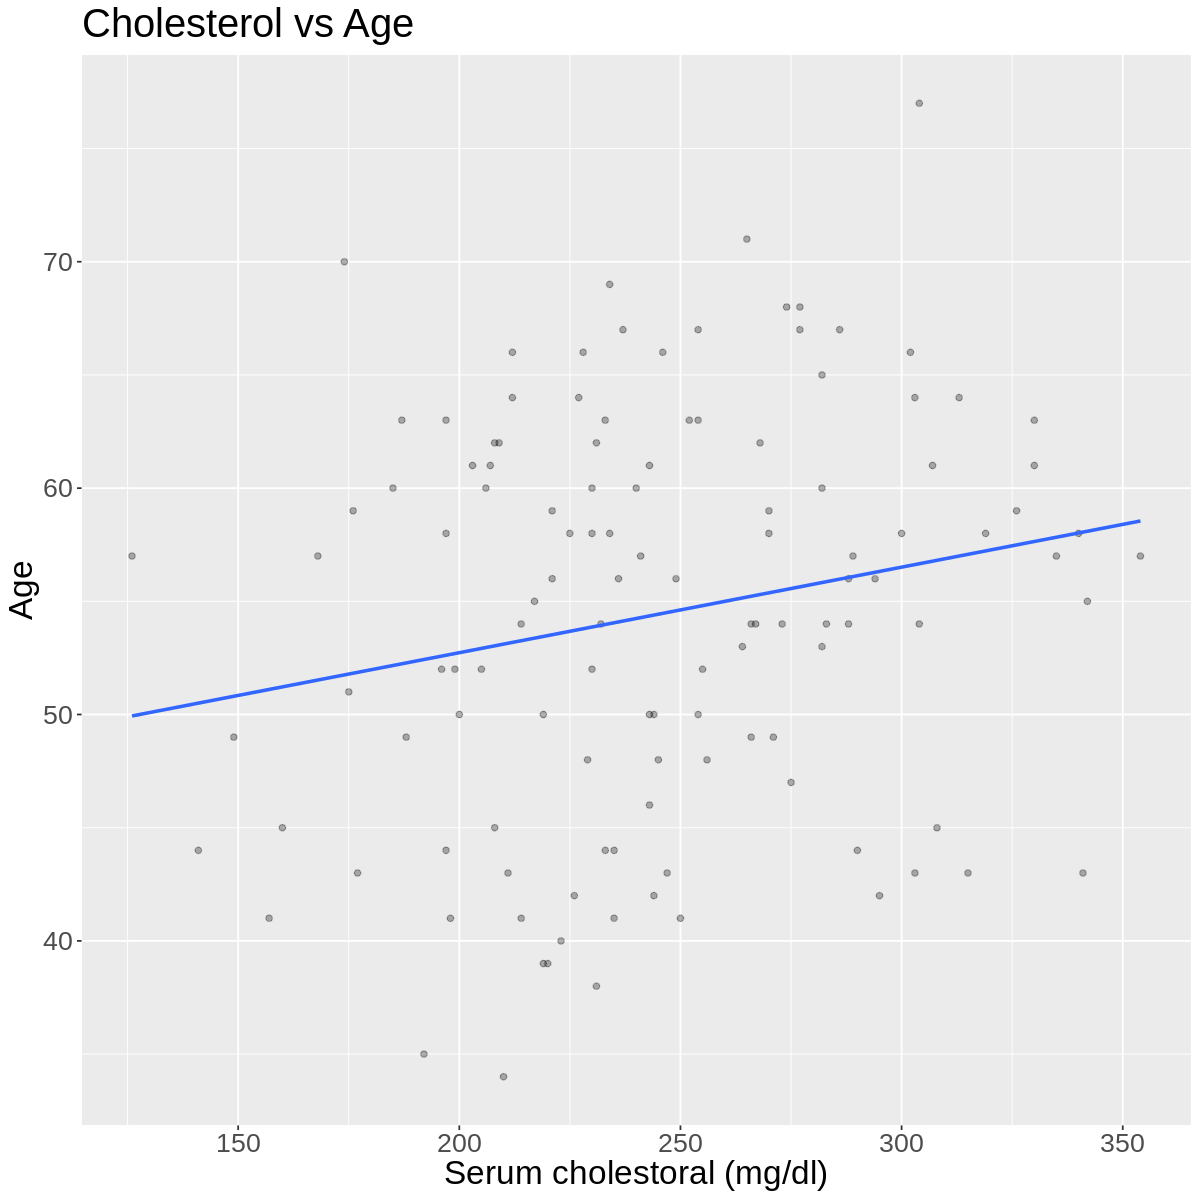

In [44]:
#Create a graph comparing cholesterol to age
chol_age_plot <- ggplot(heart_testing, aes(x = chol, y = age)) + 
                  geom_point(alpha = 0.3) +
                  xlab("Serum cholestoral (mg/dl)") + 
                  ylab("Age") + 
                  ggtitle("Cholesterol vs Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20)) 
chol_age_plot

A weak  positive linear relationship can be observed between the variables.

## Discussion

Summary: We found that that
Interpretation: (expected?)

Impact & Future q's: 

## References

*Websites*

- Centers for Disease Control and Prevention. (2021, May 18). *About High Blood Pressure (Hypertension)*. Centers for Disease Control and Prevention. https://www.cdc.gov/bloodpressure/about.htm

- *Types of heart disease.* (n.d.). Heart and Stroke Foundation of Canada. https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/types-of-heart-disease

‌
*Journals*

- Pollehn T, Brady WJ, Perron AD, et al. The electrocardiographic differential diagnosis of ST segment depression. *Emergency Medicine Journal* 2002;19:129-135.


*Dataset*
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science et al. *











*et al. 

*(dataset used has multiple citation requests in addition to the host of the site)*

*1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.*

*2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.*

*3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.*

*4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.*
‌

